### Importing libraries

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn

### Reading the data

In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [5]:
!ls 'gdrive/My Drive/Colab Notebooks/Growth_source_loan_default'

loan_defaulter1.csv  sampleSubmission.csv  train_v2.csv
loan_defaulter.csv   test_v2.csv	   Untitled.ipynb


In [6]:
data = pd.read_csv('gdrive/My Drive/Colab Notebooks/Growth_source_loan_default/train_v2.csv')

test_data = pd.read_csv('gdrive/My Drive/Colab Notebooks/Growth_source_loan_default/test_v2.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (135,204,274,417) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (417) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### Looking at the data

In [7]:
data.head()

,id,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,f38,f39,f40,f41,...,f740,f741,f742,f743,f744,f745,f746,f747,f748,f749,f750,f751,f752,f753,f754,f755,f756,f757,f758,f759,f760,f761,f762,f763,f764,f765,f766,f767,f768,f769,f770,f771,f772,f773,f774,f775,f776,f777,f778,loss
0,1,126,10,0.686842,1100,3,13699,7201.0,4949.0,126.75,126.03,7,0.7607,0.7542,612922,0.7236,0.7236,0.5171,0.7236,0.8476,0.7876,1.097851e+09,89,66,998046.0,89.0,89.0,89.00,89.00,89.0,0.9271,0,0,0,5,0,0,0.73180,0.72124,0.749280,...,-4.40,6,9.76,-21.82,49.18,1.0435,-0.9066,1.5883,3.4154,2.8283,2.3451,0.030594,1.7418,1.5271,0.8474,0.4715,0.028362,3.1611,2.5162,2.0037,0.019636,4.4352,4.2676,-0.1524,1,-0.40,-0.560,-0.440,-0.6280,-3.14,5,2.14,-1.54,1.18,0.1833,0.7873,1,0,5,0
1,2,121,10,0.782776,1100,3,84645,240.0,1625.0,123.52,121.35,7,0.6555,0.6555,245815,0.6341,0.6341,0.3909,0.6667,0.6903,0.6903,8.449459e+08,78,50,754416.0,78.0,78.0,78.00,78.00,78.0,0.8478,0,0,0,6,0,0,0.65705,0.64069,0.626200,...,0.35,7,51.73,-72.44,798.74,2.7180,-0.8294,1.0740,2.9194,2.1180,1.5666,0.120442,1.1963,1.0322,0.4843,0.2389,0.130160,2.7659,1.9523,1.4059,0.115277,3.2763,2.7962,-0.3097,1,-0.17,-0.275,-0.203,-0.2300,-1.38,6,0.54,-0.24,0.13,0.1926,-0.6787,1,0,5,0
2,3,126,10,0.500080,1100,3,83607,1800.0,1527.0,127.76,126.49,7,0.7542,0.7542,1385872,0.7542,0.7542,0.5508,0.7542,0.8091,0.7807,1.308478e+09,89,54,1037651.0,89.0,89.0,100.43,94.37,89.0,0.9175,0,0,0,13,0,0,0.74710,0.75878,0.654685,...,-6.35,14,56.62,-79.48,621.97,1.9592,-0.3632,3.2969,7.2072,5.7062,4.5627,0.226336,3.3277,3.4166,1.8321,0.9979,0.103307,6.8623,5.2963,4.1282,0.219729,8.1381,7.3269,-0.1909,1,-0.58,-0.540,-0.572,-0.3985,-5.18,13,2.89,-1.73,1.04,0.2521,0.7258,1,0,5,0
3,4,134,10,0.439874,1100,3,82642,7542.0,1730.0,132.94,133.58,7,0.8017,0.7881,704687,0.7881,0.7881,0.5923,0.7881,0.8230,0.8158,1.472752e+09,93,55,1115721.0,93.0,93.0,114.63,102.92,93.0,0.9688,0,0,0,4,0,0,0.77405,0.78929,0.750675,...,3.75,5,36.31,18.15,429.81,2.5883,-0.8812,1.2950,2.5777,2.0830,1.6899,0.054630,1.3748,1.3421,0.7982,0.4810,0.081205,2.5571,2.0593,1.6653,0.056470,3.2516,3.0631,-0.1770,1,-0.75,-0.635,-0.745,-0.5100,-2.04,4,1.29,-0.89,0.66,0.2498,0.7119,1,0,5,0
4,5,109,9,0.502749,2900,4,79124,89.0,491.0,122.72,112.77,6,0.5263,0.5263,51985,0.5263,0.5263,0.3044,0.5405,0.5556,0.5455,1.442916e+09,60,21,536400.0,60.0,60.0,60.00,60.00,60.0,0.8451,0,0,0,26,0,0,0.60315,0.53367,0.696150,...,11.45,27,2206.14,-10559.05,708436.49,9.0293,-0.8760,6.3852,17.2599,14.2795,11.9179,0.085330,7.2175,6.2262,3.1446,1.6149,0.074286,15.9080,12.5688,9.9844,0.067540,17.5561,15.6079,-0.4444,1,-0.18,-0.280,-0.182,-0.4277,-11.12,26,6.11,-3.82,2.51,0.2282,-0.5399,0,0,5,0


In [8]:
test_data.head()

,id,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,f38,f39,f40,f41,...,f739,f740,f741,f742,f743,f744,f745,f746,f747,f748,f749,f750,f751,f752,f753,f754,f755,f756,f757,f758,f759,f760,f761,f762,f763,f764,f765,f766,f767,f768,f769,f770,f771,f772,f773,f774,f775,f776,f777,f778
0,105472,147,6,0.487058,1100,17.0,75506,964.0,12686.0,152.63,115.91,12,0.8624,0.7500,25503199,0.9043,0.7016,0.6132,0.7025,0.9048,0.7699,1.751211e+09,77,75,974283.0,134.39,85.00,114.76,96.15,92.0,0.9434,0,0,0,20,0,0,0.55645,0.21888,0.707100,...,1.2006,8.00,9,109.42,19551.94,36228.78,4.8428,0.3641,5.8318,0.9244,5.0663,7.2196,0.336641,4.0067,0.6566,4.5944,0.1807,0.100164,5.9264,1.1442,0.6727,0.081454,6.7791,1.1715,NaN,1,-0.62,-0.310,-0.315,-0.7367,-8.71,19,3.30,-9.37,0.50,0.0539,-1.0733,0,1,1079
1,105473,156,6,0.728518,5400,3.0,79754,1455.0,4803.0,153.95,155.50,12,0.6639,0.6220,1679764,0.6077,0.6077,0.3575,0.6583,0.6991,0.6695,5.286814e+09,79,76,942391.0,121.53,97.35,138.01,103.54,79.0,0.7900,0,0,0,24,0,0,0.69385,0.62693,0.548275,...,0.1640,4.10,25,557.84,1269.30,31543.13,4.7209,0.7232,5.7532,12.0610,10.1518,8.6551,0.365924,6.3457,7.4756,4.4763,2.7723,0.130057,11.0000,8.8048,7.1263,0.347753,14.5358,13.5729,-0.3009,1,-0.31,-0.555,-0.369,-0.5525,-13.26,24,9.53,-7.55,6.22,0.3030,0.6087,0,1,36
2,105474,132,9,0.898133,2200,16.0,113,5735.0,2387.0,130.61,131.96,13,0.7937,0.7937,15984334,0.8197,0.7692,0.6350,0.8621,0.8696,0.8696,3.484800e+09,100,75,1320000.0,100.00,100.00,139.95,117.70,100.0,0.9709,0,0,0,9,0,0,0.79460,0.77228,0.734211,...,1.1870,11.87,10,69.14,240.57,1333.35,2.3463,0.5994,2.8146,6.4241,5.5673,4.8905,0.114978,3.0063,2.8477,1.7155,1.0628,0.132448,6.0645,5.0808,4.3027,0.100486,7.5185,7.1441,-0.1304,1,-0.71,-0.735,-0.719,-0.5544,-4.99,9,3.25,-2.33,1.69,0.2317,0.4184,0,0,393
3,105475,128,7,0.038411,1300,4.0,3793,4689.0,3469.0,120.50,121.93,9,0.6949,0.7500,247163,0.6341,0.5794,0.4848,0.8560,0.8246,0.8333,7.957115e+09,91,124,1516320.0,140.88,91.57,88.75,98.00,90.0,0.8529,0,0,0,3,0,0,0.77905,0.75680,0.763683,...,0.2494,-0.50,3,5092.64,-1060.09,23923.76,4.6887,0.6893,2.2608,10.4271,6.7042,26.9784,0.062658,2.2320,4.9000,6.2552,1.7898,0.198527,27.6734,27.2607,28.7848,0.372096,21.5487,1.2700,-1.0000,1,-0.93,-0.395,-0.080,-0.4017,-16.83,11,0.26,-5.31,0.78,0.2826,-0.7711,0,0,394
4,105476,119,10,0.443620,1300,16.0,13026,2788.0,7438.0,127.00,125.98,12,0.9032,0.0000,6543726,0.0000,0.6724,0.5079,0.7154,0.8661,0.6549,4.993310e+09,72,49,1051687.0,103.00,96.00,99.94,48.26,77.0,0.8587,0,0,0,20,0,0,0.76810,0.75689,0.744667,...,-1.0108,0.78,47,177.32,-313.53,7065.21,6.0078,0.9557,1.5397,3.9892,1.0136,0.5248,0.259062,4.8046,14.8373,1.2512,2.4337,0.102604,14.0360,2.6312,13.9360,0.007415,8.3913,1.8831,-0.0631,1,-0.50,-0.320,-0.337,-0.5488,-20.00,10,13.55,-0.61,0.01,0.1815,-1.0843,0,0,23


### Info of the data

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105471 entries, 0 to 105470
Columns: 771 entries, id to loss
dtypes: float64(653), int64(99), object(19)
memory usage: 620.4+ MB


In [10]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210944 entries, 0 to 210943
Columns: 770 entries, id to f778
dtypes: float64(654), int64(96), object(19), uint64(1)
memory usage: 1.2+ GB


### Summary of the data

In [11]:
data.describe()

,id,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,f38,f39,f40,f41,...,f740,f741,f742,f743,f744,f745,f746,f747,f748,f749,f750,f751,f752,f753,f754,f755,f756,f757,f758,f759,f760,f761,f762,f763,f764,f765,f766,f767,f768,f769,f770,f771,f772,f773,f774,f775,f776,f777,f778,loss
count,105471.000000,105471.000000,105471.000000,105471.000000,105471.000000,105471.000000,105471.000000,105289.000000,105370.000000,105471.000000,105471.000000,105471.000000,105371.000000,105423.000000,1.054710e+05,105312.000000,105448.000000,105448.000000,105011.000000,103631.000000,103773.000000,1.047730e+05,105471.000000,105471.000000,1.047730e+05,105471.000000,105471.000000,105471.000000,105471.000000,104773.000000,102899.000000,105471.0,105471.0,105471.0,105471.000000,105471.0,105471.0,105417.000000,105417.000000,105469.000000,...,105471.000000,105471.000000,105471.000000,105471.000000,1.054710e+05,105471.000000,104039.000000,105469.000000,104618.000000,104618.000000,104618.000000,104013.000000,105469.000000,105469.000000,105469.000000,105469.000000,105238.000000,104671.000000,104671.000000,104671.000000,104137.000000,105313.000000,105313.000000,103631.000000,105471.0,105470.000000,105471.000000,105471.000000,105471.000000,105471.000000,105471.000000,105471.000000,105471.000000,105471.000000,104407.000000,103946.000000,105471.000000,105471.000000,105471.000000,105471.000000
mean,52736.000000,134.603171,8.246883,0.499066,2678.488874,7.354533,47993.704317,2974.336018,2436.363718,134.555225,134.596862,11.349015,0.696120,0.678140,4.010386e+06,0.673572,0.649476,0.510736,0.685829,0.746194,0.726551,3.014404e+09,82.179803,63.420561,1.108926e+06,92.134281,86.490683,103.850939,91.672933,90.045642,0.860795,0.0,0.0,0.0,17.422571,0.0,0.0,0.645473,0.649092,0.632909,...,6.618006,18.424060,645.876713,2436.711967,1.354909e+05,4.192035,-0.040303,5.497546,11.139884,9.464936,8.115740,0.138719,6.130018,5.500419,3.390325,2.158617,0.119762,10.602136,8.782883,7.341984,0.136195,12.921228,12.103488,-0.253806,1.0,-0.471021,-0.476605,-0.471572,-0.491973,-8.786110,17.422543,5.800976,-4.246788,3.273059,0.233852,0.014797,0.310246,0.322847,175.951589,0.799585
std,30446.999458,14.725467,1.691535,0.288752,1401.010943,5.151112,35677.136048,2546.551085,2262.950221,13.824682,14.504043,3.669019,0.242829,0.241969,6.623236e+06,0.232733,0.246958,0.173126,0.241082,0.237795,0.233876,2.070153e+09,28.316093,32.431329,3.015962e+05,36.904526,30.830152,40.968777,32.681102,12.535453,0.212336,0.0,0.0,0.0,18.548927,0.0,0.0,0.192933,0.233258,0.177917,...,38.790390,18.553755,1065.119098,14454.892722,4.572537e+05,2.086577,0.807997,7.552005,13.448803,11.743093,10.319706,0.115468,8.121672,7.143152,4.685670,3.163447,0.063974,12.899936,10.998444,9.435965,0.112682,14.973088,14.151640,0.237795,0.0,0.284702,0.194983,0.263993,0.141869,9.684043,18.548936,6.508555,4.828265,3.766746,0.073578,1.039439,0.462597,0.467567,298.294043,4.321120
min,1.000000,103.000000,1.000000,0.000006,1100.000000,1.000000,0.000000,1.000000,1.000000,106.820000,103.140000,2.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.623600e+05,0.000000,0.000000,1.230000e+02,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.0,0.0,2.000000,0.0,0.0,0.000000,0.000000,0.000000,...,-513.650000,3.000000,0.000000,-152191.190000,0.000000e+00,0.000000,-1.425700,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000100,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,1.0,-0.970000,-0.950000,-0.963000,-0.945000,-85.450000,2.000000,0.000000,-43.160000,0.000000,0.000000,-18.439600,0.000000,0.000000,2.000000,0.000000
25%,26368.500000,124.000000,8.000000,0.248950,1500.000000,4.000000,11255.000000,629.000000,746.000000,124.290000,123.870000,9.000000,0.680000,0.661500,4.117930e+05,0.656000,0.635600,0.432500,0.669400,0.729700,0.710500,1.508475e+09,81.000000,45.000000,9.267570e+05,84.000000,8

In [12]:
test_data.describe()

,id,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,f38,f39,f40,f41,...,f739,f740,f741,f742,f743,f744,f745,f746,f747,f748,f749,f750,f751,f752,f753,f754,f755,f756,f757,f758,f759,f760,f761,f762,f763,f764,f765,f766,f767,f768,f769,f770,f771,f772,f773,f774,f775,f776,f777,f778
count,210944.000000,210944.000000,210944.000000,210944.000000,210944.000000,210080.000000,210944.000000,210568.000000,210792.000000,210944.000000,210944.000000,210944.000000,210736.000000,210860.000000,2.109440e+05,210588.000000,210898.000000,210898.000000,209434.000000,206412.000000,207162.000000,2.097180e+05,210944.000000,210944.000000,2.097180e+05,210944.000000,210944.000000,210944.000000,210944.000000,209718.000000,205324.000000,210944.0,210944.0,210944.0,210944.000000,210944.0,210944.0,210874.000000,210874.000000,210940.000000,...,210944.000000,210944.000000,210944.000000,210944.000000,210944.000000,2.109440e+05,210944.000000,207730.000000,210940.000000,209074.000000,209074.000000,209074.000000,207970.000000,210940.000000,210940.000000,210940.000000,210940.000000,210534.000000,209180.000000,209180.00000,209180.000000,208100.000000,210576.000000,210576.000000,206412.000000,210944.0,210942.000000,210940.000000,210940.000000,210944.000000,210944.000000,210944.000000,210944.000000,210944.000000,210944.000000,208878.000000,207984.000000,210944.000000,210944.000000,210944.000000
mean,210943.500000,135.125085,8.220011,0.501206,2711.977586,7.805027,53153.425582,3310.628196,2779.705928,135.144399,135.129890,10.897243,0.704697,0.685144,4.928433e+06,0.681077,0.652533,0.514177,0.694507,0.755567,0.736094,3.126906e+09,83.257557,65.427696,1.126761e+06,94.342131,88.053483,105.351082,92.919496,90.540736,0.866563,0.0,0.0,0.0,17.532568,0.0,0.0,0.646572,0.651902,0.626734,...,0.142117,5.648926,18.533156,611.288840,1827.071909,1.144384e+05,4.144459,-0.053626,5.386753,11.084361,9.367420,7.990207,0.140326,6.043607,5.463032,3.349048,2.120401,0.122725,10.567343,8.71804,7.258908,0.138594,13.002634,12.176309,-0.244433,1.0,-0.469006,-0.475542,-0.469756,-0.491663,-8.832556,17.532539,5.824868,-4.258049,3.275899,0.234896,0.026736,0.293576,0.340754,210.792277
std,60894.431929,14.896286,1.712893,0.289458,1415.640909,5.402407,35172.502441,2958.323661,2642.629935,14.073423,14.696504,3.666249,0.235320,0.234805,8.697324e+06,0.225354,0.240546,0.173867,0.233101,0.226681,0.223105,2.168113e+09,27.482780,33.009506,3.065997e+05,37.143557,30.349114,40.542606,31.930144,12.374882,0.206963,0.0,0.0,0.0,18.608269,0.0,0.0,0.186869,0.226896,0.173285,...,1.570569,36.767894,18.610285,974.549492,12730.146540,4.001925e+05,2.010590,0.802306,7.460826,13.415052,11.652784,10.185301,0.113707,8.061288,7.086717,4.615423,3.089065,0.064032,12.869997,10.93636,9.349799,0.111374,15.049065,14.223634,0.226681,0.0,0.284156,0.194069,0.263289,0.140763,9.624229,18.608292,6.427181,4.745248,3.686927,0.073238,1.037437,0.455401,0.473964,322.843199
min,105472.000000,103.000000,1.000000,0.000009,1100.000000,1.000000,0.000000,1.000000,1.000000,103.830000,103.000000,2.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000100,0.000000,0.000000,0.000000,2.327160e+05,0.000000,0.000000,1.320000e+02,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.0,0.0,2.000000,0.0,0.0,0.000000,0.000000,0.000000,...,-8.577600,-385.990000,3.000000,0.000000,-94419.730000,0.000000e+00,0.000000,-1.464800,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000100,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,-1.000000,1.0,-0.970000,-0.950000,-0.963000,-0.950000,-92.930000,1.000000,0.000000,-43.750000,0.000000,0.000000,-21.802600,0.000000,0.000000,2.000000
25%,158207.750000,124.000000,8.000000,0.250245,1500.000000,4.000000,12622.000000,665.000000,835.000000,124.500000,124.030000,8.000000,0.686400,0.669400,3.890352e+05,0.661700,0.638500,0.436700,0.676900,0.737300,0.718800,1.531200e+09,82.000000,47.000000,9.408000e+05,85.000000

### Data Shape

In [13]:
print("data Shape : {}".format(data.shape))

print("test data Shape : {}".format(test_data.shape))

data Shape : (105471, 771)
test data Shape : (210944, 770)


In [14]:
data.columns

Index(['id', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9',
       ...
       'f770', 'f771', 'f772', 'f773', 'f774', 'f775', 'f776', 'f777', 'f778',
       'loss'],
      dtype='object', length=771)

In [15]:
test_data.columns

Index(['id', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9',
       ...
       'f769', 'f770', 'f771', 'f772', 'f773', 'f774', 'f775', 'f776', 'f777',
       'f778'],
      dtype='object', length=770)

### Missing values

In [16]:
print(pd.isnull(data).sum().sort_values(ascending=False))

f663    18833
f662    18833
f159    18736
f160    18736
f169    18417
        ...  
f370        0
f371        0
f372        0
f376        0
id          0
Length: 771, dtype: int64


In [17]:
total_cells = np.product(data.shape)
total_missing_values = (data.isnull().sum()).sum()

print('percentage of missing vales in data: {0:.2f}' .format((total_missing_values/total_cells)*100))

percentage of missing vales in data: 0.97


In [18]:
total_cells = np.product(test_data.shape)
total_missing_values = (test_data.isnull().sum()).sum()

print('percentage of missing vales in test data: {0:.2f}' .format((total_missing_values/total_cells)*100))

percentage of missing vales in test data: 0.93


### Different values of loss and their count

In [19]:
print(data['loss'].value_counts())

0     95688
2      1297
1      1145
3      1086
4      1038
      ...  
92        1
77        1
85        1
80        1
63        1
Name: loss, Length: 89, dtype: int64


### Unique loss values

In [20]:
print(data['loss'].unique())

[  0   1  16  19   4  11  21   2   9   5   3   7  13   6  25  44  17 100
  10   8  65  15  12  29  22  20  18  41  55  28  23  14  38  42  33  27
  24  39  26  31  35  64  32  54  37  61  79  51  43  77  47  36  46  81
  78  60  45  85  84  34  90  40  50  92  74  62  53  59  89  48  30  49
  99  73  95  83  56  70  71  68  94  72  57  58  52  63  69  76  80]


### Loss count of default and non-default

In [21]:
print((data['loss']==0).value_counts())

True     95688
False     9783
Name: loss, dtype: int64


In [22]:
print("Not Default data: {} ".format((data['loss'] == 0).sum()))
print("Default data: {} ".format((data['loss'] > 0).sum()))

Not Default data: 95688 
Default data: 9783 




> Dropping columns with more than 10000 Nan



In [0]:
dropped_data = data.dropna(axis=1, thresh=95471)

In [24]:
dropped_data.head()

,id,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,f38,f39,f40,f41,...,f740,f741,f742,f743,f744,f745,f746,f747,f748,f749,f750,f751,f752,f753,f754,f755,f756,f757,f758,f759,f760,f761,f762,f763,f764,f765,f766,f767,f768,f769,f770,f771,f772,f773,f774,f775,f776,f777,f778,loss
0,1,126,10,0.686842,1100,3,13699,7201.0,4949.0,126.75,126.03,7,0.7607,0.7542,612922,0.7236,0.7236,0.5171,0.7236,0.8476,0.7876,1.097851e+09,89,66,998046.0,89.0,89.0,89.00,89.00,89.0,0.9271,0,0,0,5,0,0,0.73180,0.72124,0.749280,...,-4.40,6,9.76,-21.82,49.18,1.0435,-0.9066,1.5883,3.4154,2.8283,2.3451,0.030594,1.7418,1.5271,0.8474,0.4715,0.028362,3.1611,2.5162,2.0037,0.019636,4.4352,4.2676,-0.1524,1,-0.40,-0.560,-0.440,-0.6280,-3.14,5,2.14,-1.54,1.18,0.1833,0.7873,1,0,5,0
1,2,121,10,0.782776,1100,3,84645,240.0,1625.0,123.52,121.35,7,0.6555,0.6555,245815,0.6341,0.6341,0.3909,0.6667,0.6903,0.6903,8.449459e+08,78,50,754416.0,78.0,78.0,78.00,78.00,78.0,0.8478,0,0,0,6,0,0,0.65705,0.64069,0.626200,...,0.35,7,51.73,-72.44,798.74,2.7180,-0.8294,1.0740,2.9194,2.1180,1.5666,0.120442,1.1963,1.0322,0.4843,0.2389,0.130160,2.7659,1.9523,1.4059,0.115277,3.2763,2.7962,-0.3097,1,-0.17,-0.275,-0.203,-0.2300,-1.38,6,0.54,-0.24,0.13,0.1926,-0.6787,1,0,5,0
2,3,126,10,0.500080,1100,3,83607,1800.0,1527.0,127.76,126.49,7,0.7542,0.7542,1385872,0.7542,0.7542,0.5508,0.7542,0.8091,0.7807,1.308478e+09,89,54,1037651.0,89.0,89.0,100.43,94.37,89.0,0.9175,0,0,0,13,0,0,0.74710,0.75878,0.654685,...,-6.35,14,56.62,-79.48,621.97,1.9592,-0.3632,3.2969,7.2072,5.7062,4.5627,0.226336,3.3277,3.4166,1.8321,0.9979,0.103307,6.8623,5.2963,4.1282,0.219729,8.1381,7.3269,-0.1909,1,-0.58,-0.540,-0.572,-0.3985,-5.18,13,2.89,-1.73,1.04,0.2521,0.7258,1,0,5,0
3,4,134,10,0.439874,1100,3,82642,7542.0,1730.0,132.94,133.58,7,0.8017,0.7881,704687,0.7881,0.7881,0.5923,0.7881,0.8230,0.8158,1.472752e+09,93,55,1115721.0,93.0,93.0,114.63,102.92,93.0,0.9688,0,0,0,4,0,0,0.77405,0.78929,0.750675,...,3.75,5,36.31,18.15,429.81,2.5883,-0.8812,1.2950,2.5777,2.0830,1.6899,0.054630,1.3748,1.3421,0.7982,0.4810,0.081205,2.5571,2.0593,1.6653,0.056470,3.2516,3.0631,-0.1770,1,-0.75,-0.635,-0.745,-0.5100,-2.04,4,1.29,-0.89,0.66,0.2498,0.7119,1,0,5,0
4,5,109,9,0.502749,2900,4,79124,89.0,491.0,122.72,112.77,6,0.5263,0.5263,51985,0.5263,0.5263,0.3044,0.5405,0.5556,0.5455,1.442916e+09,60,21,536400.0,60.0,60.0,60.00,60.00,60.0,0.8451,0,0,0,26,0,0,0.60315,0.53367,0.696150,...,11.45,27,2206.14,-10559.05,708436.49,9.0293,-0.8760,6.3852,17.2599,14.2795,11.9179,0.085330,7.2175,6.2262,3.1446,1.6149,0.074286,15.9080,12.5688,9.9844,0.067540,17.5561,15.6079,-0.4444,1,-0.18,-0.280,-0.182,-0.4277,-11.12,26,6.11,-3.82,2.51,0.2282,-0.5399,0,0,5,0


In [25]:
drop_cols = list(set(list(data.columns)) - set(list(dropped_data.columns)))
print('length of columns to drop: {}\n'.format(len(drop_cols)))
drop_cols

length of columns to drop: 25



['f190',
 'f169',
 'f667',
 'f662',
 'f159',
 'f179',
 'f189',
 'f668',
 'f160',
 'f330',
 'f666',
 'f663',
 'f180',
 'f664',
 'f331',
 'f618',
 'f340',
 'f341',
 'f170',
 'f619',
 'f669',
 'f665',
 'f653',
 'f726',
 'f422']

In [0]:
dropped_test_data = test_data.drop(drop_cols, axis=1)

In [27]:
dropped_test_data.head()

,id,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,f38,f39,f40,f41,...,f739,f740,f741,f742,f743,f744,f745,f746,f747,f748,f749,f750,f751,f752,f753,f754,f755,f756,f757,f758,f759,f760,f761,f762,f763,f764,f765,f766,f767,f768,f769,f770,f771,f772,f773,f774,f775,f776,f777,f778
0,105472,147,6,0.487058,1100,17.0,75506,964.0,12686.0,152.63,115.91,12,0.8624,0.7500,25503199,0.9043,0.7016,0.6132,0.7025,0.9048,0.7699,1.751211e+09,77,75,974283.0,134.39,85.00,114.76,96.15,92.0,0.9434,0,0,0,20,0,0,0.55645,0.21888,0.707100,...,1.2006,8.00,9,109.42,19551.94,36228.78,4.8428,0.3641,5.8318,0.9244,5.0663,7.2196,0.336641,4.0067,0.6566,4.5944,0.1807,0.100164,5.9264,1.1442,0.6727,0.081454,6.7791,1.1715,NaN,1,-0.62,-0.310,-0.315,-0.7367,-8.71,19,3.30,-9.37,0.50,0.0539,-1.0733,0,1,1079
1,105473,156,6,0.728518,5400,3.0,79754,1455.0,4803.0,153.95,155.50,12,0.6639,0.6220,1679764,0.6077,0.6077,0.3575,0.6583,0.6991,0.6695,5.286814e+09,79,76,942391.0,121.53,97.35,138.01,103.54,79.0,0.7900,0,0,0,24,0,0,0.69385,0.62693,0.548275,...,0.1640,4.10,25,557.84,1269.30,31543.13,4.7209,0.7232,5.7532,12.0610,10.1518,8.6551,0.365924,6.3457,7.4756,4.4763,2.7723,0.130057,11.0000,8.8048,7.1263,0.347753,14.5358,13.5729,-0.3009,1,-0.31,-0.555,-0.369,-0.5525,-13.26,24,9.53,-7.55,6.22,0.3030,0.6087,0,1,36
2,105474,132,9,0.898133,2200,16.0,113,5735.0,2387.0,130.61,131.96,13,0.7937,0.7937,15984334,0.8197,0.7692,0.6350,0.8621,0.8696,0.8696,3.484800e+09,100,75,1320000.0,100.00,100.00,139.95,117.70,100.0,0.9709,0,0,0,9,0,0,0.79460,0.77228,0.734211,...,1.1870,11.87,10,69.14,240.57,1333.35,2.3463,0.5994,2.8146,6.4241,5.5673,4.8905,0.114978,3.0063,2.8477,1.7155,1.0628,0.132448,6.0645,5.0808,4.3027,0.100486,7.5185,7.1441,-0.1304,1,-0.71,-0.735,-0.719,-0.5544,-4.99,9,3.25,-2.33,1.69,0.2317,0.4184,0,0,393
3,105475,128,7,0.038411,1300,4.0,3793,4689.0,3469.0,120.50,121.93,9,0.6949,0.7500,247163,0.6341,0.5794,0.4848,0.8560,0.8246,0.8333,7.957115e+09,91,124,1516320.0,140.88,91.57,88.75,98.00,90.0,0.8529,0,0,0,3,0,0,0.77905,0.75680,0.763683,...,0.2494,-0.50,3,5092.64,-1060.09,23923.76,4.6887,0.6893,2.2608,10.4271,6.7042,26.9784,0.062658,2.2320,4.9000,6.2552,1.7898,0.198527,27.6734,27.2607,28.7848,0.372096,21.5487,1.2700,-1.0000,1,-0.93,-0.395,-0.080,-0.4017,-16.83,11,0.26,-5.31,0.78,0.2826,-0.7711,0,0,394
4,105476,119,10,0.443620,1300,16.0,13026,2788.0,7438.0,127.00,125.98,12,0.9032,0.0000,6543726,0.0000,0.6724,0.5079,0.7154,0.8661,0.6549,4.993310e+09,72,49,1051687.0,103.00,96.00,99.94,48.26,77.0,0.8587,0,0,0,20,0,0,0.76810,0.75689,0.744667,...,-1.0108,0.78,47,177.32,-313.53,7065.21,6.0078,0.9557,1.5397,3.9892,1.0136,0.5248,0.259062,4.8046,14.8373,1.2512,2.4337,0.102604,14.0360,2.6312,13.9360,0.007415,8.3913,1.8831,-0.0631,1,-0.50,-0.320,-0.337,-0.5488,-20.00,10,13.55,-0.61,0.01,0.1815,-1.0843,0,0,23


### Looking at the object data type

In [29]:
dropped_data.select_dtypes(include=['object']).head()

,f137,f138,f206,f207,f276,f277,f338,f390,f391,f419,f420,f469,f472,f534,f537,f626,f627,f695,f698
0,8090000000000000,754485076006959972352,3200000000000,38600000000000000,7900000000000000,683091368180479950848,7610000000000,10370164393071999997033054208,13621142007705000132589703585884798976,137000000000,511000000000000,569877634360569973702656,3427303293502300223465356001280,240811094251680005357568,1185103615651699994464937312256,11724173453590999285553430528,16027029142402000396838501389877379072,8700000000000000000,8010000000000000000
1,2250000000000,15300000000000000,392000000000,1690000000000000,92300000000000,2140000000000000000,796594176,5098137566366599989877014528,5366154527659000357778647583412977664,9483264,1593188352,107000000000000000,9894337169928600158208,251470350285930004480,161196782629860003268263936,6391495663130699779035627520,7158933769610900052770065343332745216,5890000000000000000,5030000000000000000
2,186000000000000,6910365323840000000,23700000000000,389000000000000000,10300000000000,69200000000000000,461000000000,26400269714792999161039945728,36117033568522998807722429270944907264,36051866452,63500000000000,313319151143610023936,222812827058929985669562368,116067852739909992448,61668865475731997253959680,36420952401170000260810932224,56027915541865997900093655676589441024,24512111987574001664,19855991371293999104
3,44500000000000000,11225194901267999096832,16098514954,35000000000000,22200000000000,295000000000000000,1330000000000,9333818143939599917454983168,12638526060843999893906772076814925824,5621900678,9380000000000,2641626213765599994052608,24452856014536001129152839155712,202899352692079984640,126293716597939998795235328,15267506423634001098621059072,24362045267421999852972382580757233664,9660000000000000000,6960000000000000000
4,52152926246,108000000000000,442000000000,1870000000000000,3630000000000,23100000000000000,2240000000000,196004669899870011305513451520,428213273484070002013091334592080642048,279000000000,659000000000000,68300000000000,922000000000000000,654000000000000000,89341826582645997305856,238204359524660008028924280832,550170020491249969340152709153269219328,108505460071560003584,94766610066210996224


In [30]:
dropped_data.select_dtypes(include=['object']).columns

Index(['f137', 'f138', 'f206', 'f207', 'f276', 'f277', 'f338', 'f390', 'f391',
       'f419', 'f420', 'f469', 'f472', 'f534', 'f537', 'f626', 'f627', 'f695',
       'f698'],
      dtype='object')

### Categorical columns in data type int

In [31]:
int_type_cols = dropped_data.select_dtypes(include=['int']).columns
len(int_type_cols)

99

In [32]:
cols = 0
singleval_col = []
for col in int_type_cols:
  if len(dropped_data[col].unique()) <= 1:
    singleval_col.append(col)
    cols+=1
print('Columns with only single categories: {}\n'.format(cols))
singleval_col

Columns with only single categories: 10



['f33', 'f34', 'f35', 'f37', 'f38', 'f700', 'f701', 'f702', 'f736', 'f764']

### Dropping single value columns

In [33]:
dropped_data.drop(singleval_col, axis=1, inplace=True)
dropped_data.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,id,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f36,f39,f40,f41,f42,f43,f44,f45,f46,...,f739,f740,f741,f742,f743,f744,f745,f746,f747,f748,f749,f750,f751,f752,f753,f754,f755,f756,f757,f758,f759,f760,f761,f762,f763,f765,f766,f767,f768,f769,f770,f771,f772,f773,f774,f775,f776,f777,f778,loss
0,1,126,10,0.686842,1100,3,13699,7201.0,4949.0,126.75,126.03,7,0.7607,0.7542,612922,0.7236,0.7236,0.5171,0.7236,0.8476,0.7876,1.097851e+09,89,66,998046.0,89.0,89.0,89.00,89.00,89.0,0.9271,5,0.73180,0.72124,0.749280,5.0,0.026826,1.037424,0.83380,0.84284,...,-0.7333,-4.40,6,9.76,-21.82,49.18,1.0435,-0.9066,1.5883,3.4154,2.8283,2.3451,0.030594,1.7418,1.5271,0.8474,0.4715,0.028362,3.1611,2.5162,2.0037,0.019636,4.4352,4.2676,-0.1524,-0.40,-0.560,-0.440,-0.6280,-3.14,5,2.14,-1.54,1.18,0.1833,0.7873,1,0,5,0
1,2,121,10,0.782776,1100,3,84645,240.0,1625.0,123.52,121.35,7,0.6555,0.6555,245815,0.6341,0.6341,0.3909,0.6667,0.6903,0.6903,8.449459e+08,78,50,754416.0,78.0,78.0,78.00,78.00,78.0,0.8478,6,0.65705,0.64069,0.626200,6.0,0.107658,-0.915138,0.72515,0.70127,...,0.0500,0.35,7,51.73,-72.44,798.74,2.7180,-0.8294,1.0740,2.9194,2.1180,1.5666,0.120442,1.1963,1.0322,0.4843,0.2389,0.130160,2.7659,1.9523,1.4059,0.115277,3.2763,2.7962,-0.3097,-0.17,-0.275,-0.203,-0.2300,-1.38,6,0.54,-0.24,0.13,0.1926,-0.6787,1,0,5,0
2,3,126,10,0.500080,1100,3,83607,1800.0,1527.0,127.76,126.49,7,0.7542,0.7542,1385872,0.7542,0.7542,0.5508,0.7542,0.8091,0.7807,1.308478e+09,89,54,1037651.0,89.0,89.0,100.43,94.37,89.0,0.9175,13,0.74710,0.75878,0.654685,13.0,0.208224,-1.332533,0.80455,0.80819,...,-0.4536,-6.35,14,56.62,-79.48,621.97,1.9592,-0.3632,3.2969,7.2072,5.7062,4.5627,0.226336,3.3277,3.4166,1.8321,0.9979,0.103307,6.8623,5.2963,4.1282,0.219729,8.1381,7.3269,-0.1909,-0.58,-0.540,-0.572,-0.3985,-5.18,13,2.89,-1.73,1.04,0.2521,0.7258,1,0,5,0
3,4,134,10,0.439874,1100,3,82642,7542.0,1730.0,132.94,133.58,7,0.8017,0.7881,704687,0.7881,0.7881,0.5923,0.7881,0.8230,0.8158,1.472752e+09,93,55,1115721.0,93.0,93.0,114.63,102.92,93.0,0.9688,4,0.77405,0.78929,0.750675,4.0,0.043725,-0.947279,0.81150,0.82070,...,0.7500,3.75,5,36.31,18.15,429.81,2.5883,-0.8812,1.2950,2.5777,2.0830,1.6899,0.054630,1.3748,1.3421,0.7982,0.4810,0.081205,2.5571,2.0593,1.6653,0.056470,3.2516,3.0631,-0.1770,-0.75,-0.635,-0.745,-0.5100,-2.04,4,1.29,-0.89,0.66,0.2498,0.7119,1,0,5,0
4,5,109,9,0.502749,2900,4,79124,89.0,491.0,122.72,112.77,6,0.5263,0.5263,51985,0.5263,0.5263,0.3044,0.5405,0.5556,0.5455,1.442916e+09,60,21,536400.0,60.0,60.0,60.00,60.00,60.0,0.8451,26,0.60315,0.53367,0.696150,26.0,0.062251,-0.950251,0.71780,0.59004,...,0.4241,11.45,27,2206.14,-10559.05,708436.49,9.0293,-0.8760,6.3852,17.2599,14.2795,11.9179,0.085330,7.2175,6.2262,3.1446,1.6149,0.074286,15.9080,12.5688,9.9844,0.067540,17.5561,15.6079,-0.4444,-0.18,-0.280,-0.182,-0.4277,-11.12,26,6.11,-3.82,2.51,0.2282,-0.5399,0,0,5,0


In [34]:
dropped_test_data.drop(singleval_col, axis=1, inplace=True)
dropped_test_data.head()

,id,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f36,f39,f40,f41,f42,f43,f44,f45,f46,...,f738,f739,f740,f741,f742,f743,f744,f745,f746,f747,f748,f749,f750,f751,f752,f753,f754,f755,f756,f757,f758,f759,f760,f761,f762,f763,f765,f766,f767,f768,f769,f770,f771,f772,f773,f774,f775,f776,f777,f778
0,105472,147,6,0.487058,1100,17.0,75506,964.0,12686.0,152.63,115.91,12,0.8624,0.7500,25503199,0.9043,0.7016,0.6132,0.7025,0.9048,0.7699,1.751211e+09,77,75,974283.0,134.39,85.00,114.76,96.15,92.0,0.9434,20,0.55645,0.21888,0.707100,12.0,0.004470,-3.698668,0.60100,0.81566,...,10.430,1.2006,8.00,9,109.42,19551.94,36228.78,4.8428,0.3641,5.8318,0.9244,5.0663,7.2196,0.336641,4.0067,0.6566,4.5944,0.1807,0.100164,5.9264,1.1442,0.6727,0.081454,6.7791,1.1715,NaN,-0.62,-0.310,-0.315,-0.7367,-8.71,19,3.30,-9.37,0.50,0.0539,-1.0733,0,1,1079
1,105473,156,6,0.728518,5400,3.0,79754,1455.0,4803.0,153.95,155.50,12,0.6639,0.6220,1679764,0.6077,0.6077,0.3575,0.6583,0.6991,0.6695,5.286814e+09,79,76,942391.0,121.53,97.35,138.01,103.54,79.0,0.7900,24,0.69385,0.62693,0.548275,24.0,0.330004,-0.969744,0.76955,0.71919,...,-0.018,0.1640,4.10,25,557.84,1269.30,31543.13,4.7209,0.7232,5.7532,12.0610,10.1518,8.6551,0.365924,6.3457,7.4756,4.4763,2.7723,0.130057,11.0000,8.8048,7.1263,0.347753,14.5358,13.5729,-0.3009,-0.31,-0.555,-0.369,-0.5525,-13.26,24,9.53,-7.55,6.22,0.3030,0.6087,0,1,36
2,105474,132,9,0.898133,2200,16.0,113,5735.0,2387.0,130.61,131.96,13,0.7937,0.7937,15984334,0.8197,0.7692,0.6350,0.8621,0.8696,0.8696,3.484800e+09,100,75,1320000.0,100.00,100.00,139.95,117.70,100.0,0.9709,9,0.79460,0.77228,0.734211,9.0,0.085184,-0.934609,0.90480,0.87264,...,4.710,1.1870,11.87,10,69.14,240.57,1333.35,2.3463,0.5994,2.8146,6.4241,5.5673,4.8905,0.114978,3.0063,2.8477,1.7155,1.0628,0.132448,6.0645,5.0808,4.3027,0.100486,7.5185,7.1441,-0.1304,-0.71,-0.735,-0.719,-0.5544,-4.99,9,3.25,-2.33,1.69,0.2317,0.4184,0,0,393
3,105475,128,7,0.038411,1300,4.0,3793,4689.0,3469.0,120.50,121.93,9,0.6949,0.7500,247163,0.6341,0.5794,0.4848,0.8560,0.8246,0.8333,7.957115e+09,91,124,1516320.0,140.88,91.57,88.75,98.00,90.0,0.8529,3,0.77905,0.75680,0.763683,10.0,0.227667,-1.379703,0.75180,0.92844,...,9.071,0.2494,-0.50,3,5092.64,-1060.09,23923.76,4.6887,0.6893,2.2608,10.4271,6.7042,26.9784,0.062658,2.2320,4.9000,6.2552,1.7898,0.198527,27.6734,27.2607,28.7848,0.372096,21.5487,1.2700,-1.0000,-0.93,-0.395,-0.080,-0.4017,-16.83,11,0.26,-5.31,0.78,0.2826,-0.7711,0,0,394
4,105476,119,10,0.443620,1300,16.0,13026,2788.0,7438.0,127.00,125.98,12,0.9032,0.0000,6543726,0.0000,0.6724,0.5079,0.7154,0.8661,0.6549,4.993310e+09,72,49,1051687.0,103.00,96.00,99.94,48.26,77.0,0.8587,20,0.76810,0.75689,0.744667,9.0,0.213051,-1.273337,0.39000,0.73088,...,0.684,-1.0108,0.78,47,177.32,-313.53,7065.21,6.0078,0.9557,1.5397,3.9892,1.0136,0.5248,0.259062,4.8046,14.8373,1.2512,2.4337,0.102604,14.0360,2.6312,13.9360,0.007415,8.3913,1.8831,-0.0631,-0.50,-0.320,-0.337,-0.5488,-20.00,10,13.55,-0.61,0.01,0.1815,-1.0843,0,0,23


### Looking at the categorical data with binary columns

In [35]:
int_type_cols = dropped_data.select_dtypes(include=['int']).columns
len(int_type_cols)

89

In [36]:
binary_cols = 0
binary_val_col = []

for col in int_type_cols:
  if len(dropped_data[col].unique()) == 2:
    binary_val_col.append(col)
    binary_cols+=1
print('Columns with two categories: {}\n'.format(binary_cols))
binary_val_col

Columns with two categories: 2



['f776', 'f777']

In [38]:
dropped_data[['f776', 'f777']].head()

,f776,f777
0,1,0
1,1,0
2,1,0
3,1,0
4,0,0


In [39]:
dropped_data['f776'].value_counts()

0    72749
1    32722
Name: f776, dtype: int64

In [40]:
dropped_data['f777'].value_counts()

0    71420
1    34051
Name: f777, dtype: int64

### Looking at the categorical data with more than 2 values 

In [41]:
int_type_cols = dropped_data.select_dtypes(include=['int']).columns
len(int_type_cols)

89

In [42]:
cat_cols = 0
cat_val_col = []

for col in int_type_cols:
  if len(dropped_data[col].unique()) > 2:
    cat_val_col.append(col)
    cat_cols+=1
print('Columns with more then two categories: {}\n'.format(cat_cols))
cat_val_col

Columns with more then two categories: 87



['id',
 'f1',
 'f2',
 'f4',
 'f5',
 'f6',
 'f13',
 'f16',
 'f24',
 'f25',
 'f36',
 'f68',
 'f73',
 'f74',
 'f284',
 'f285',
 'f286',
 'f287',
 'f293',
 'f294',
 'f295',
 'f296',
 'f301',
 'f302',
 'f303',
 'f304',
 'f309',
 'f310',
 'f311',
 'f312',
 'f317',
 'f318',
 'f319',
 'f320',
 'f325',
 'f326',
 'f327',
 'f328',
 'f335',
 'f336',
 'f337',
 'f345',
 'f354',
 'f362',
 'f371',
 'f379',
 'f380',
 'f381',
 'f382',
 'f400',
 'f403',
 'f408',
 'f417',
 'f418',
 'f427',
 'f447',
 'f465',
 'f467',
 'f477',
 'f478',
 'f480',
 'f521',
 'f530',
 'f531',
 'f532',
 'f597',
 'f599',
 'f656',
 'f657',
 'f658',
 'f659',
 'f670',
 'f674',
 'f681',
 'f693',
 'f699',
 'f722',
 'f725',
 'f728',
 'f729',
 'f730',
 'f731',
 'f732',
 'f741',
 'f770',
 'f778',
 'loss']

### Filling the missing values 

In [0]:
filled_data = dropped_data.fillna(method='bfill')

filled_test_data = dropped_test_data.fillna(method='bfill')

In [44]:
print(pd.isnull(filled_data).sum().sort_values(ascending=False))

loss    0
f256    0
f265    0
f264    0
f263    0
       ..
f512    0
f511    0
f510    0
f509    0
id      0
Length: 736, dtype: int64


In [45]:
print(pd.isnull(filled_test_data).sum().sort_values(ascending=False))

f778    0
f266    0
f264    0
f263    0
f262    0
       ..
f511    0
f510    0
f509    0
f508    0
id      0
Length: 735, dtype: int64


### Making the 'loss' column binary

In [46]:
filled_data['loss'] = (filled_data['loss'] > 0).astype(int)
filled_data.head()

,id,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f36,f39,f40,f41,f42,f43,f44,f45,f46,...,f739,f740,f741,f742,f743,f744,f745,f746,f747,f748,f749,f750,f751,f752,f753,f754,f755,f756,f757,f758,f759,f760,f761,f762,f763,f765,f766,f767,f768,f769,f770,f771,f772,f773,f774,f775,f776,f777,f778,loss
0,1,126,10,0.686842,1100,3,13699,7201.0,4949.0,126.75,126.03,7,0.7607,0.7542,612922,0.7236,0.7236,0.5171,0.7236,0.8476,0.7876,1.097851e+09,89,66,998046.0,89.0,89.0,89.00,89.00,89.0,0.9271,5,0.73180,0.72124,0.749280,5.0,0.026826,1.037424,0.83380,0.84284,...,-0.7333,-4.40,6,9.76,-21.82,49.18,1.0435,-0.9066,1.5883,3.4154,2.8283,2.3451,0.030594,1.7418,1.5271,0.8474,0.4715,0.028362,3.1611,2.5162,2.0037,0.019636,4.4352,4.2676,-0.1524,-0.40,-0.560,-0.440,-0.6280,-3.14,5,2.14,-1.54,1.18,0.1833,0.7873,1,0,5,0
1,2,121,10,0.782776,1100,3,84645,240.0,1625.0,123.52,121.35,7,0.6555,0.6555,245815,0.6341,0.6341,0.3909,0.6667,0.6903,0.6903,8.449459e+08,78,50,754416.0,78.0,78.0,78.00,78.00,78.0,0.8478,6,0.65705,0.64069,0.626200,6.0,0.107658,-0.915138,0.72515,0.70127,...,0.0500,0.35,7,51.73,-72.44,798.74,2.7180,-0.8294,1.0740,2.9194,2.1180,1.5666,0.120442,1.1963,1.0322,0.4843,0.2389,0.130160,2.7659,1.9523,1.4059,0.115277,3.2763,2.7962,-0.3097,-0.17,-0.275,-0.203,-0.2300,-1.38,6,0.54,-0.24,0.13,0.1926,-0.6787,1,0,5,0
2,3,126,10,0.500080,1100,3,83607,1800.0,1527.0,127.76,126.49,7,0.7542,0.7542,1385872,0.7542,0.7542,0.5508,0.7542,0.8091,0.7807,1.308478e+09,89,54,1037651.0,89.0,89.0,100.43,94.37,89.0,0.9175,13,0.74710,0.75878,0.654685,13.0,0.208224,-1.332533,0.80455,0.80819,...,-0.4536,-6.35,14,56.62,-79.48,621.97,1.9592,-0.3632,3.2969,7.2072,5.7062,4.5627,0.226336,3.3277,3.4166,1.8321,0.9979,0.103307,6.8623,5.2963,4.1282,0.219729,8.1381,7.3269,-0.1909,-0.58,-0.540,-0.572,-0.3985,-5.18,13,2.89,-1.73,1.04,0.2521,0.7258,1,0,5,0
3,4,134,10,0.439874,1100,3,82642,7542.0,1730.0,132.94,133.58,7,0.8017,0.7881,704687,0.7881,0.7881,0.5923,0.7881,0.8230,0.8158,1.472752e+09,93,55,1115721.0,93.0,93.0,114.63,102.92,93.0,0.9688,4,0.77405,0.78929,0.750675,4.0,0.043725,-0.947279,0.81150,0.82070,...,0.7500,3.75,5,36.31,18.15,429.81,2.5883,-0.8812,1.2950,2.5777,2.0830,1.6899,0.054630,1.3748,1.3421,0.7982,0.4810,0.081205,2.5571,2.0593,1.6653,0.056470,3.2516,3.0631,-0.1770,-0.75,-0.635,-0.745,-0.5100,-2.04,4,1.29,-0.89,0.66,0.2498,0.7119,1,0,5,0
4,5,109,9,0.502749,2900,4,79124,89.0,491.0,122.72,112.77,6,0.5263,0.5263,51985,0.5263,0.5263,0.3044,0.5405,0.5556,0.5455,1.442916e+09,60,21,536400.0,60.0,60.0,60.00,60.00,60.0,0.8451,26,0.60315,0.53367,0.696150,26.0,0.062251,-0.950251,0.71780,0.59004,...,0.4241,11.45,27,2206.14,-10559.05,708436.49,9.0293,-0.8760,6.3852,17.2599,14.2795,11.9179,0.085330,7.2175,6.2262,3.1446,1.6149,0.074286,15.9080,12.5688,9.9844,0.067540,17.5561,15.6079,-0.4444,-0.18,-0.280,-0.182,-0.4277,-11.12,26,6.11,-3.82,2.51,0.2282,-0.5399,0,0,5,0


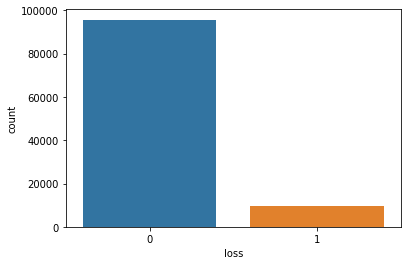

In [47]:
sns.countplot(filled_data['loss'])

### Detecting column and rows with 'NA' values and dropping them

In [0]:
NA_columns = filled_data.isin(['NA']).any()

NA_columns_test = filled_test_data.isin(['NA']).any()

In [49]:
NA_columns[NA_columns == True]

f137    True
dtype: bool

In [50]:
NA_columns_test[NA_columns_test == True]

f276    True
dtype: bool

In [51]:
NA_rows = (filled_data['f137'] == 'NA')
na_rows = NA_rows[NA_rows == True]
na_rows

83843    True
91200    True
91850    True
91851    True
91912    True
Name: f137, dtype: bool

In [52]:
NA_rows_test = (filled_test_data['f276'] == 'NA')
na_rows_test = NA_rows_test[NA_rows_test == True]
na_rows_test

56483     True
56978     True
137388    True
137509    True
137618    True
Name: f276, dtype: bool

In [0]:
#filled_data.drop(na_rows.index, axis=0, inplace=True)

#filled_test_data.drop(na_rows_test.index, axis=0, inplace=True)

In [0]:
filled_data.drop(['f137', 'f276'], axis=1, inplace=True)

filled_test_data.drop(['f137', 'f276'], axis=1, inplace=True)

### Correlation matrix and dropping the higly correlated columns

In [55]:
corr_matrix = filled_data.corr().abs()
corr_matrix["loss"].sort_values(ascending=False)

loss    1.000000
f766    0.134531
f404    0.134485
f322    0.123838
f405    0.120804
          ...   
f660    0.000541
f725    0.000511
f380    0.000332
f679    0.000063
f678         NaN
Name: loss, Length: 717, dtype: float64

In [0]:
corr_matrix_test = filled_test_data.corr().abs()

In [57]:
corr_matrix

,id,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f36,f39,f40,f41,f42,f43,f44,f45,f46,...,f739,f740,f741,f742,f743,f744,f745,f746,f747,f748,f749,f750,f751,f752,f753,f754,f755,f756,f757,f758,f759,f760,f761,f762,f763,f765,f766,f767,f768,f769,f770,f771,f772,f773,f774,f775,f776,f777,f778,loss
id,1.000000,0.042966,0.018418,0.004061,0.042855,0.074279,0.048518,0.018331,0.041433,0.047053,0.043907,0.056353,0.028471,0.032538,0.011060,0.025550,0.026627,0.000361,0.029925,0.024934,0.024362,0.042861,0.024137,0.022402,0.025363,0.003002,0.014187,0.011023,0.018127,0.007454,0.003897,0.000435,0.038973,0.028725,0.048123,0.000477,0.054500,0.007616,0.040611,0.028004,...,0.002748,0.008314,0.000450,0.004244,0.006362,0.005762,0.011627,0.007512,0.011821,0.009100,0.010505,0.011747,0.048914,0.010279,0.006597,0.007407,0.007960,0.041095,0.009103,0.010164,0.011085,0.052006,0.004029,0.004152,0.024934,0.001729,0.005786,0.002288,0.013096,0.001271,0.000437,0.001546,0.001525,0.001295,0.002965,0.008369,0.005805,0.045460,0.050143,0.012704
f1,0.042966,1.000000,0.210388,0.000370,0.782389,0.269849,0.102250,0.161152,0.174811,0.972323,0.998662,0.056130,0.310058,0.334807,0.075052,0.341349,0.405708,0.209578,0.343307,0.304639,0.321623,0.729611,0.299080,0.302254,0.314196,0.117610,0.094827,0.026837,0.138636,0.030425,0.238091,0.081410,0.516497,0.428863,0.581520,0.082437,0.635953,0.060188,0.401154,0.325007,...,0.275461,0.096094,0.081430,0.020572,0.059417,0.041303,0.106737,0.032153,0.190060,0.149546,0.146647,0.143163,0.595418,0.158098,0.139503,0.129635,0.117627,0.634889,0.157599,0.157826,0.157258,0.591990,0.139472,0.138368,0.304639,0.051244,0.090794,0.056776,0.156907,0.056685,0.081408,0.044220,0.036631,0.031180,0.004114,0.066385,0.078637,0.873927,0.270134,0.015786
f2,0.018418,0.210388,1.000000,0.003149,0.215980,0.221009,0.091765,0.132275,0.156194,0.248444,0.218659,0.063015,0.007962,0.001150,0.260137,0.012976,0.011555,0.175813,0.001198,0.008008,0.016240,0.323337,0.026845,0.494467,0.400539,0.140234,0.086309,0.079520,0.054675,0.286584,0.032641,0.078230,0.015500,0.012379,0.023871,0.078573,0.218268,0.000482,0.000484,0.007272,...,0.061767,0.012622,0.078268,0.105575,0.108127,0.110521,0.078712,0.067827,0.037783,0.074341,0.062640,0.051856,0.167427,0.033035,0.017870,0.015370,0.045788,0.202588,0.077825,0.067248,0.057554,0.179047,0.065645,0.058119,0.008008,0.143914,0.244484,0.158950,0.421080,0.015446,0.078232,0.020417,0.044855,0.063950,0.023787,0.173672,0.097982,0.225693,0.221553,0.001280
f3,0.004061,0.000370,0.003149,1.000000,0.000040,0.002255,0.003789,0.001317,0.003357,0.000905,0.000504,0.002047,0.002424,0.002142,0.000051,0.001448,0.001817,0.000340,0.001845,0.001730,0.001410,0.000556,0.001679,0.002047,0.000537,0.001064,0.001438,0.001904,0.001863,0.000177,0.000059,0.001931,0.002038,0.001964,0.000586,0.001935,0.000956,0.000473,0.000521,0.000225,...,0.004320,0.005159,0.001930,0.002339,0.002329,0.000053,0.002065,0.004610,0.002210,0.002721,0.002819,0.002913,0.001439,0.002426,0.002112,0.002054,0.001949,0.002570,0.002702,0.002799,0.002891,0.001372,0.002182,0.002212,0.001730,0.003102,0.001051,0.002731,0.001824,0.002227,0.001931,0.002581,0.002818,0.002964,0.002880,0.005589,0.001653,0.000149,0.000504,0.004334
f4,0.042855,0.782389,0.215980,0.000040,1.000000,0.256425,0.119798,0.231391,0.210613,0.832383,0.794265,0.049142,0.333909,0.354990,0.106806,0.368797,0.409833,0.191034,0.365027,0.328459,0.347988,0.833825,0.337085,0.216014,0.263842,0.099360,0.124896,0.053784,0.143052,0.061007,0.263359,0.108025,0.525204,0.433688,0.600938,0.109048,0.675625,0.055864,0.439684,0.351919,...,0.059019,0.030794,0.108048,0.015810,0.105022,0.040023,0.156845,0.050281,0.239575,0.188753,0.185808,0.181860,0.652010,0.204990,0.176719,0.170611,0.160164,0.610713,0.198215,0.199088,0.198718,0.645282,0.179593,0.179209,0.328459,0.025017,0.043436,0.027550,0.068501,0.094411,0.108024,0.088417,0.085026,0.082677,0.024385,0.037426,0.038133,0.875710,0.262051,0.005225
...,...,..

In [58]:
corr_matrix_test

,id,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f36,f39,f40,f41,f42,f43,f44,f45,f46,...,f738,f739,f740,f741,f742,f743,f744,f745,f746,f747,f748,f749,f750,f751,f752,f753,f754,f755,f756,f757,f758,f759,f760,f761,f762,f763,f765,f766,f767,f768,f769,f770,f771,f772,f773,f774,f775,f776,f777,f778
id,1.000000,0.001459,0.000865,0.003288,0.000347,0.002492,0.000920,0.002711,0.001043,0.000412,0.000898,0.001617,0.000023,0.000172,0.003831,0.002246,0.000042,0.001166,0.000869,0.000273,0.000432,0.000289,0.000645,0.003215,0.001101,0.001254,0.000365,0.001977,0.001617,0.001874,0.001226,0.000659,0.003728,0.000032,0.001533,0.000170,0.001611,0.000151,0.001411,0.000792,...,0.001327,0.002817,0.000858,0.003300,0.000561,0.001774,0.000873,0.000888,0.000041,0.001311,0.002319,0.000481,0.001924,0.000369,0.004544,0.002828,0.000521,0.001012,0.002599,0.001606,0.001512,0.001745,0.003635,0.001236,0.001793,0.003935,0.002885,0.002420,0.000837,0.000731,0.003212,0.001288,0.000934,0.001552,0.000538,0.005666,0.000943,0.000153,0.002431,0.001559
f1,0.001459,1.000000,0.122532,0.001111,0.397919,0.157400,0.038407,0.081743,0.068435,0.488491,0.500391,0.010044,0.133098,0.146609,0.046748,0.152624,0.184966,0.101482,0.148492,0.132626,0.141710,0.370592,0.128056,0.166853,0.172189,0.093929,0.015451,0.046593,0.042992,0.002079,0.107065,0.049237,0.239782,0.195658,0.285983,0.050376,0.318004,0.048496,0.179880,0.142604,...,0.206852,0.150519,0.061361,0.050055,0.016206,0.033063,0.022744,0.045545,0.011853,0.099310,0.080330,0.080500,0.076919,0.288486,0.083384,0.078028,0.073165,0.066193,0.320771,0.082636,0.081723,0.082658,0.287935,0.076721,0.075317,0.131999,0.025235,0.046320,0.027785,0.093603,0.032541,0.051110,0.025930,0.025498,0.019772,0.001076,0.036975,0.043478,0.443332,0.135163
f2,0.000865,0.122532,1.000000,0.001261,0.128752,0.144530,0.054445,0.054932,0.074710,0.144042,0.128746,0.050623,0.003133,0.000346,0.122493,0.009359,0.006016,0.085968,0.000804,0.002391,0.005921,0.179831,0.013279,0.249373,0.208209,0.084336,0.052975,0.048735,0.033774,0.145596,0.010500,0.038862,0.011730,0.008866,0.026178,0.039288,0.123673,0.006992,0.000033,0.003203,...,0.036015,0.041885,0.016506,0.040814,0.045940,0.045670,0.041750,0.022237,0.035942,0.022553,0.036427,0.029446,0.025845,0.100018,0.018640,0.008733,0.004893,0.019629,0.120653,0.039732,0.033675,0.026607,0.102813,0.033886,0.028375,0.002487,0.071109,0.123846,0.076193,0.218510,0.005552,0.041351,0.013625,0.029297,0.038505,0.011334,0.094071,0.061404,0.131976,0.127670
f3,0.003288,0.001111,0.001261,1.000000,0.003070,0.002201,0.002391,0.000335,0.003707,0.001210,0.002605,0.002615,0.002537,0.002522,0.001796,0.003795,0.001427,0.001299,0.002692,0.001320,0.002941,0.002543,0.002574,0.007769,0.000140,0.005907,0.003969,0.003017,0.003028,0.001472,0.002209,0.003394,0.000817,0.000546,0.001164,0.000176,0.000477,0.001618,0.001838,0.000151,...,0.001684,0.002582,0.000390,0.004208,0.003673,0.003350,0.005147,0.000261,0.005322,0.002530,0.001160,0.003342,0.000030,0.001106,0.000966,0.001457,0.001473,0.002591,0.001694,0.005647,0.003393,0.002724,0.000960,0.002213,0.001619,0.002286,0.001261,0.000768,0.000468,0.000236,0.001560,0.004723,0.000202,0.000415,0.001692,0.001243,0.001866,0.001993,0.003472,0.001695
f4,0.000347,0.397919,0.128752,0.003070,1.000000,0.148943,0.046484,0.122244,0.091668,0.422682,0.403178,0.004951,0.143585,0.155015,0.056696,0.156536,0.178753,0.090830,0.156492,0.143336,0.148772,0.417080,0.141741,0.128511,0.146995,0.087648,0.028594,0.058507,0.042769,0.019478,0.115039,0.059837,0.234478,0.189870,0.289150,0.058748,0.332531,0.049975,0.190660,0.151802,...,0.009674,0.042542,0.004004,0.057868,0.007103,0.051156,0.015888,0.082388,0.024287,0.118909,0.095075,0.095147,0.092731,0.311624,0.103663,0.092424,0.091472,0.084799,0.304131,0.101712,0.099674,0.098377,0.311155,0.090990,0.089753,0.139782,0.013160,0.025087,0.016339,0.050672,0.047820,0.058380,0.046113,0.040526,0.039386,0.014549,0.019482,0.022030,0.438237,0.135770
...,...,..

In [0]:
# Select upper triangle of correlation matrix
upper_tri_corr = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
upper_tri_corr_test = corr_matrix_test.where(np.triu(np.ones(corr_matrix_test.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
corr_col_to_drop = [column for column in upper_tri_corr.columns if any(upper_tri_corr[column] > 0.90)]
#corr_col_to_drop_test = [column for column in upper_tri_corr_test.columns if any(upper_tri_corr_test[column] > 0.90)]

In [60]:
len(corr_col_to_drop)

450

In [0]:
#len(corr_col_to_drop_test)

In [0]:
# Drop highly correlated features 
filled_data.drop(filled_data[corr_col_to_drop], axis=1, inplace=True)

In [0]:
filled_test_data.drop(filled_test_data[corr_col_to_drop], axis=1, inplace=True)

In [64]:
filled_data.head()

,id,f1,f2,f3,f4,f5,f6,f7,f8,f13,f14,f16,f19,f23,f25,f26,f27,f32,f36,f39,f41,f43,f44,f45,f47,f54,f55,f57,f63,f65,f66,f67,f69,f71,f72,f73,f75,f77,f80,f81,...,f648,f649,f650,f652,f654,f656,f657,f660,f661,f670,f672,f673,f674,f677,f678,f679,f680,f682,f695,f696,f698,f715,f716,f723,f725,f733,f734,f737,f739,f740,f742,f743,f744,f746,f751,f756,f775,f776,f778,loss
0,1,126,10,0.686842,1100,3,13699,7201.0,4949.0,7,0.7607,612922,0.5171,1.097851e+09,66,998046.0,89.0,0.9271,5,0.73180,0.749280,0.026826,1.037424,0.83380,0.825920,2.661469,0.53855,0.551920,0.95355,0.960160,0.025156,4.5785,-0.01,0.1127,-0.03,9,5.11,6.04,0.99,1.40,...,2.52,7.22,-0.05,264.0,140.82,342,71594,1.14,1.34,335,13.97,15.41,33,3.0,0.0,3.0,98.18,68.40,8700000000000000000,0.186912,8010000000000000000,19085002.34,1.354874,0.0,0,1.41,-2.00,-1.60,-0.7333,-4.40,9.76,-21.82,49.18,-0.9066,0.030594,0.028362,0.7873,1,5,0
1,2,121,10,0.782776,1100,3,84645,240.0,1625.0,7,0.6555,245815,0.3909,8.449459e+08,50,754416.0,78.0,0.8478,6,0.65705,0.626200,0.107658,-0.915138,0.72515,0.687067,-0.812372,0.42545,0.393817,0.85390,0.793950,0.142922,4.5785,-0.04,0.0143,-0.14,9,4.19,6.10,0.92,1.36,...,-0.04,1.15,0.01,210.0,115.41,327,49087,1.15,1.38,335,9.09,13.90,43,1.0,0.0,3.0,72.19,54.50,5890000000000000000,0.191660,5030000000000000000,499868.11,0.832299,0.0,0,3.23,-4.86,-2.73,0.0500,0.35,51.73,-72.44,798.74,-0.8294,0.120442,0.130160,-0.6787,1,5,0
2,3,126,10,0.500080,1100,3,83607,1800.0,1527.0,7,0.7542,1385872,0.5508,1.308478e+09,54,1037651.0,89.0,0.9175,13,0.74710,0.654685,0.208224,-1.332533,0.80455,0.709346,-1.336869,0.54540,0.502138,0.88875,0.798423,0.254750,4.5785,-0.03,0.0218,-0.01,9,4.72,7.20,0.92,1.39,...,-0.31,-0.27,-0.01,5.0,8.67,296,11454,1.12,1.44,335,-0.59,-0.42,100,9.0,0.0,3.0,19.04,22.77,24512111987574001664,0.252978,19855991371293999104,8734754.02,1.665038,0.0,0,2.16,-1.64,0.12,-0.4536,-6.35,56.62,-79.48,621.97,-0.3632,0.226336,0.103307,0.7258,1,5,0
3,4,134,10,0.439874,1100,3,82642,7542.0,1730.0,7,0.8017,704687,0.5923,1.472752e+09,55,1115721.0,93.0,0.9688,4,0.77405,0.750675,0.043725,-0.947279,0.81150,0.800900,-1.121228,0.58615,0.573525,0.95440,0.928550,0.067230,4.5785,0.02,0.0114,0.01,9,6.35,5.97,1.00,1.42,...,-0.56,0.89,0.06,41.0,28.50,139,5101,-0.62,1.11,335,1.56,5.63,18,7.0,0.0,3.0,15.73,27.80,9660000000000000000,0.250200,6960000000000000000,20623708.98,1.498953,0.0,0,3.41,1.00,0.16,0.7500,3.75,36.31,18.15,429.81,-0.8812,0.054630,0.081205,0.7119,1,5,0
4,5,109,9,0.502749,2900,4,79124,89.0,491.0,6,0.5263,51985,0.3044,1.442916e+09,21,536400.0,60.0,0.8451,26,0.60315,0.696150,0.062251,-0.950251,0.71780,0.810285,-0.807304,0.37220,0.483685,0.86255,0.870969,0.075199,4.9649,-0.20,0.0038,-0.14,8,2.78,6.34,0.62,1.25,...,-0.01,-0.27,-0.16,84.0,50.23,834,62900,1.37,1.78,381,4.10,3.80,33,3.0,0.0,3.0,37.29,32.08,108505460071560003584,0.230740,94766610066210996224,169033.74,0.826984,0.0,0,9.31,-17.48,-3.91,0.4241,11.45,2206.14,-10559.05,708436.49,-0.8760,0.085330,0.074286,-0.5399,0,5,0


In [65]:
filled_test_data.head()

,id,f1,f2,f3,f4,f5,f6,f7,f8,f13,f14,f16,f19,f23,f25,f26,f27,f32,f36,f39,f41,f43,f44,f45,f47,f54,f55,f57,f63,f65,f66,f67,f69,f71,f72,f73,f75,f77,f80,f81,...,f647,f648,f649,f650,f652,f654,f656,f657,f660,f661,f670,f672,f673,f674,f677,f678,f679,f680,f682,f695,f696,f698,f715,f716,f723,f725,f733,f734,f737,f739,f740,f742,f743,f744,f746,f751,f756,f775,f776,f778
0,105472,147,6,0.487058,1100,17.0,75506,964.0,12686.0,12,0.8624,25503199,0.6132,1.751211e+09,75,974283.0,134.39,0.9434,20,0.55645,0.707100,0.004470,-3.698668,0.60100,0.807439,-0.398194,0.15835,0.624898,0.94370,0.782160,0.116780,10.1376,-0.02,0.0787,-0.25,6,8.12,8.22,0.90,1.46,...,1.100461,0.56,-0.04,-0.10,17.0,40.40,594,89356,1.27,1.91,544,7.27,3.91,42,7.0,0.0,1.0,55.74,52.25,218240343345329995776,0.228876,8460000000000000000,2698128.01,1.462215,0.0,5,7.20,9.11,0.000,1.2006,8.00,109.42,19551.94,36228.78,0.3641,0.336641,0.100164,-1.0733,0,1079
1,105473,156,6,0.728518,5400,3.0,79754,1455.0,4803.0,12,0.6639,1679764,0.3575,5.286814e+09,76,942391.0,121.53,0.7900,24,0.69385,0.548275,0.330004,-0.969744,0.76955,0.607158,-0.969763,0.47875,0.542742,0.86500,0.780086,0.324782,5.9969,0.03,0.0479,-0.25,7,7.08,6.12,1.16,1.67,...,1.202230,3.33,12.65,-0.21,13.0,65.07,1129,163995,1.30,1.57,1527,-0.89,-0.93,30,5.0,0.0,1.0,67.97,47.04,1524637149948299968512,0.303497,1300378525524699906048,3626746.92,1.283305,0.0,4,4.94,0.48,-1.650,0.1640,4.10,557.84,1269.30,31543.13,0.7232,0.365924,0.130057,0.6087,0,36
2,105474,132,9,0.898133,2200,16.0,113,5735.0,2387.0,13,0.7937,15984334,0.6350,3.484800e+09,75,1320000.0,100.00,0.9709,9,0.79460,0.734211,0.085184,-0.934609,0.90480,0.837000,-0.948081,0.64750,0.546689,0.97545,0.937322,0.065611,11.0767,0.02,0.0727,-0.08,9,9.18,6.03,0.95,1.39,...,1.227834,1.22,5.69,0.08,21.0,24.57,400,43782,1.27,1.55,863,-0.25,-0.05,10,11.0,0.0,1.0,53.75,44.44,62278817826730000384,0.236179,54398406039877001216,16992136.77,1.333605,0.0,2,2.83,4.70,3.740,1.1870,11.87,69.14,240.57,1333.35,0.5994,0.114978,0.132448,0.4184,0,393
3,105475,128,7,0.038411,1300,4.0,3793,4689.0,3469.0,9,0.6949,247163,0.4848,7.957115e+09,124,1516320.0,140.88,0.8529,3,0.77905,0.763683,0.227667,-1.379703,0.75180,0.630343,-0.954191,0.31860,0.466500,0.44000,0.996033,0.075121,4.9211,0.02,0.0071,-1.00,6,5.10,6.13,1.01,1.07,...,1.106501,-0.13,-0.35,-1.00,61.0,64.89,1162,35023,1.36,1.91,1382,-0.67,-0.32,6,4.0,0.0,3.0,246.45,47.43,985854849900939968512,0.234415,13895378646893000704,20429961.69,1.308072,0.0,5,4.03,0.17,-0.705,0.2494,-0.50,5092.64,-1060.09,23923.76,0.6893,0.062658,0.198527,-0.7711,0,394
4,105476,119,10,0.443620,1300,16.0,13026,2788.0,7438.0,12,0.9032,6543726,0.5079,4.993310e+09,49,1051687.0,103.00,0.8587,20,0.76810,0.744667,0.213051,-1.273337,0.39000,0.773100,-1.139170,0.61710,0.605820,0.68475,0.616250,0.460420,11.4176,-0.09,0.0060,-1.00,10,9.53,5.93,1.43,1.47,...,2.082769,-0.13,31.60,-1.00,158.0,25.00,1403,7060,1.47,1.11,577,-0.67,1.47,43,10.0,0.0,2.0,61.43,110.20,117730664761299992576,0.315559,159091745475649994752,191695.28,1.104026,0.0,2,5.49,1.45,1.185,-1.0108,0.78,177.32,-313.53,7065.21,0.9557,0.259062,0.102604,-1.0843,0,23


### Splitting the data

In [0]:
from sklearn.model_selection import train_test_split
#X, y = filled_data.iloc[:, 1:-1].values, filled_data.iloc[:, -1].values
X, y = filled_data.iloc[:, 1:-1], filled_data.iloc[:, -1]

In [67]:
X

,f1,f2,f3,f4,f5,f6,f7,f8,f13,f14,f16,f19,f23,f25,f26,f27,f32,f36,f39,f41,f43,f44,f45,f47,f54,f55,f57,f63,f65,f66,f67,f69,f71,f72,f73,f75,f77,f80,f81,f82,...,f647,f648,f649,f650,f652,f654,f656,f657,f660,f661,f670,f672,f673,f674,f677,f678,f679,f680,f682,f695,f696,f698,f715,f716,f723,f725,f733,f734,f737,f739,f740,f742,f743,f744,f746,f751,f756,f775,f776,f778
0,126,10,0.686842,1100,3,13699,7201.0,4949.0,7,0.7607,612922,0.5171,1.097851e+09,66,998046.0,89.0,0.9271,5,0.73180,0.749280,0.026826,1.037424,0.83380,0.825920,2.661469,0.53855,0.551920,0.95355,0.960160,0.025156,4.5785,-0.01,0.1127,-0.03,9,5.11,6.04,0.99,1.40,0.51,...,-1.590684,2.52,7.22,-0.05,264.0,140.82,342,71594,1.14,1.34,335,13.97,15.41,33,3.0,0.0,3.0,98.18,68.40,8700000000000000000,0.186912,8010000000000000000,19085002.34,1.354874,0.0,0,1.41,-2.00,-1.600,-0.7333,-4.40,9.76,-21.82,49.18,-0.9066,0.030594,0.028362,0.7873,1,5
1,121,10,0.782776,1100,3,84645,240.0,1625.0,7,0.6555,245815,0.3909,8.449459e+08,50,754416.0,78.0,0.8478,6,0.65705,0.626200,0.107658,-0.915138,0.72515,0.687067,-0.812372,0.42545,0.393817,0.85390,0.793950,0.142922,4.5785,-0.04,0.0143,-0.14,9,4.19,6.10,0.92,1.36,0.02,...,1.341852,-0.04,1.15,0.01,210.0,115.41,327,49087,1.15,1.38,335,9.09,13.90,43,1.0,0.0,3.0,72.19,54.50,5890000000000000000,0.191660,5030000000000000000,499868.11,0.832299,0.0,0,3.23,-4.86,-2.730,0.0500,0.35,51.73,-72.44,798.74,-0.8294,0.120442,0.130160,-0.6787,1,5
2,126,10,0.500080,1100,3,83607,1800.0,1527.0,7,0.7542,1385872,0.5508,1.308478e+09,54,1037651.0,89.0,0.9175,13,0.74710,0.654685,0.208224,-1.332533,0.80455,0.709346,-1.336869,0.54540,0.502138,0.88875,0.798423,0.254750,4.5785,-0.03,0.0218,-0.01,9,4.72,7.20,0.92,1.39,0.01,...,1.660758,-0.31,-0.27,-0.01,5.0,8.67,296,11454,1.12,1.44,335,-0.59,-0.42,100,9.0,0.0,3.0,19.04,22.77,24512111987574001664,0.252978,19855991371293999104,8734754.02,1.665038,0.0,0,2.16,-1.64,0.120,-0.4536,-6.35,56.62,-79.48,621.97,-0.3632,0.226336,0.103307,0.7258,1,5
3,134,10,0.439874,1100,3,82642,7542.0,1730.0,7,0.8017,704687,0.5923,1.472752e+09,55,1115721.0,93.0,0.9688,4,0.77405,0.750675,0.043725,-0.947279,0.81150,0.800900,-1.121228,0.58615,0.573525,0.95440,0.928550,0.067230,4.5785,0.02,0.0114,0.01,9,6.35,5.97,1.00,1.42,0.01,...,1.022309,-0.56,0.89,0.06,41.0,28.50,139,5101,-0.62,1.11,335,1.56,5.63,18,7.0,0.0,3.0,15.73,27.80,9660000000000000000,0.250200,6960000000000000000,20623708.98,1.498953,0.0,0,3.41,1.00,0.160,0.7500,3.75,36.31,18.15,429.81,-0.8812,0.054630,0.081205,0.7119,1,5
4,109,9,0.502749,2900,4,79124,89.0,491.0,6,0.5263,51985,0.3044,1.442916e+09,21,536400.0,60.0,0.8451,26,0.60315,0.696150,0.062251,-0.950251,0.71780,0.810285,-0.807304,0.37220,0.483685,0.86255,0.870969,0.075199,4.9649,-0.20,0.0038,-0.14,8,2.78,6.34,0.62,1.25,0.26,...,1.306169,-0.01,-0.27,-0.16,84.0,50.23,834,62900,1.37,1.78,381,4.10,3.80,33,3.0,0.0,3.0,37.29,32.08,108505460071560003584,0.230740,94766610066210996224,169033.74,0.826984,0.0,0,9.31,-17.48,-3.910,0.4241,11.45,2206.14,-10559.05,708436.49,-0.8760,0.085330,0.074286,-0.5399,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105466,126,8,0.006620,2200,4,76831,331.0,2366.0,7,0.4878,9281480,0.2147,1.178496e+09,0,446400.0,60.0,0.5607,3,0.62075,0.677967,0.153387,-0.885535,0.65000,0.714367,-0.876990,0.41735,0.484100,0.76035,0.829767,0.192497,5.3760,0.01,0.2242,-0.42,8,7.69,7.95,0.83,1.33,0.01,...,1.104494,13.04,6.80,-0.41,67.0,108.50,367,73689,0.87,1.11,557,-0.55,0.08,9,1.0,0.0,3.0,97.97,122.33,12183870366603999232,0.384013,11314611507345999872,2140786.70,1.756423,0.0,0,1.00,1.00,0.210,-0.1675,-0.67,2.45,-0.30,2.20,0.7937,0.167967,0.190560,-0.5489,0,93
105467,137,9,0.358568,2200,4,9836,3898.0,1106.0,10,0.7227,901745,0.5147,2.206863e+09,50,1013252.0,86.0,0.8776,3,0.

In [68]:
y

0         0
1         0
2         0
3         0
4         0
         ..
105466    0
105467    0
105468    0
105469    0
105470    0
Name: loss, Length: 105471, dtype: int64

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

### Oversampling the minority class data

In [0]:
# from sklearn.utils import resample

# samples = X_train[y_train == 0].shape[0]

# X_upsampled, y_upsampled = resample(X_train[y_train == 1], y_train[y_train == 1], replace=True, n_samples= samples , random_state=123)
# X_train_bal = np.vstack((X_train[y_train == 0], X_upsampled))
# y_train_bal = np.hstack((y_train[y_train == 0], y_upsampled))

In [0]:
#X_upsampled

In [0]:
#y_upsampled

In [0]:
#X_train_bal

In [0]:
#y_train_bal

### Data normalization


In [0]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

# X_train_norm = ss.fit_transform(X_train_bal)
# y_train = y_train_bal
X_train_norm = ss.fit_transform(X_train)

X_test_norm = ss.transform(X_test)

### Modeling and accuracy scores

In [0]:
#from sklearn.feature_selection import RFE
#from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
#from sklearn.ensemble import GradientBoostingClassifier
#from sklearn.svm import SVC


In [0]:
#lr = LogisticRegression(penalty='l1', solver='liblinear', class_weight='balanced')
forest = RandomForestClassifier(n_estimators=70, max_depth=10, random_state=2, class_weight='balanced')
#gbrt = GradientBoostingClassifier(n_estimators=10, max_depth=10, random_state=2)
#svm = SVC(kernel='rbf', C=10, gamma=0.1, class_weight='balanced')

#rfe = RFE(lr, 100)

In [0]:
# from sklearn.model_selection import GridSearchCV

# param_grid = {'n_estimators': [100, 125, 150, 175, 200],
#               'max_depth': [25, 30, 35, 40, 45]}

# grid_search = GridSearchCV(RandomForestClassifier(random_state=2, class_weight='balanced'), param_grid, cv=2)

In [79]:
#lr.fit(X_train_norm, y_train)
forest.fit(X_train_norm, y_train)#
#gbrt.fit(X_train_norm, y_train)
#svm.fit(X_train_norm, y_train)
#fit = rfe.fit(X_train, y_train)

#grid_search.fit(X_train_norm, y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=70, n_jobs=None, oob_score=False,
                       random_state=2, verbose=0, warm_start=False)

In [80]:
#print('Training accuracy:', lr.score(X_train_norm, y_train))
#print('Testing accuracy:', lr.score(X_test_norm, y_test))

print('Training accuracy:', forest.score(X_train_norm, y_train))
print('Testing accuracy:', forest.score(X_test_norm, y_test))

#print('Training accuracy:', gbrt.score(X_train_norm, y_train))
#print('Testing accuracy:', gbrt.score(X_test_norm, y_test))

#print('Training accuracy:', svm.score(X_train_norm, y_train))
#print('Testing accuracy:', svm.score(X_test_norm, y_test))

#print('Training accuracy:', grid_search.score(X_train_norm, y_train))
#print('Testing accuracy:', grid_search.score(X_test_norm, y_test))
#print("Best parameters: ", grid_search.best_params_)


Training accuracy: 0.7981551964675128
Testing accuracy: 0.7453384741798875


In [0]:
#y_test_pred = lr.predict(X_test_norm)
y_test_pred = forest.predict(X_test_norm)
#y_test_pred = gbrt.predict(X_test_norm)
#y_test_pred = svm.predict(X_test_norm)
#y_test_pred = grid_search.predict(X_test_norm)

### F1 score

In [82]:
from sklearn.metrics import f1_score
f1_score(y_test_pred, y_test)

0.24789994399850668

### Confusion matrix

In [83]:
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test_pred, y_test)
print("Confusion matrix:\n\n{}".format(confusion))


Confusion matrix:

[[22256  1607]
 [ 6451  1328]]


### Classification Report

In [84]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_test_pred,
target_names=["not default", "default"]))


              precision    recall  f1-score   support

 not default       0.93      0.78      0.85     28707
     default       0.17      0.45      0.25      2935

    accuracy                           0.75     31642
   macro avg       0.55      0.61      0.55     31642
weighted avg       0.86      0.75      0.79     31642



### ROC AUC score

In [85]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test_pred, y_test)

0.5516866410752596

In [0]:
# print("Best parameters: {}".format(grid_search.best_params_))
# print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

### Predicting the original test file

In [0]:
X_test_norm = ss.transform(filled_test_data.iloc[:,1:])
test_file_pred = forest.predict(X_test_norm)

In [0]:
submission = pd.DataFrame({'id':filled_test_data['id'],'loss':test_file_pred})

submission.head()

,id,loss
0,105472,0
1,105473,0
2,105474,1
3,105475,0
4,105476,0


In [0]:
submission['loss'].value_counts()

In [0]:
# filename = 'loan_defaulter1.csv'

# submission.to_csv(filename,index=False)

# print('Saved file: ' + filename)


Saved file: loan_defaulter1.csv


In [0]:
# !cp loan_defaulter1.csv 'gdrive/My Drive/Colab Notebooks/Growth_source_loan_default'

### Feature Selection and extraction